### USC ID  : 8534717045
### NAME   : SRINATH BEGUDEM
### GITHUB: SrinathBegudem
### 1 extra day is used out of 6 days.(This is the first time i am using my late submission day due to slow laptop and high cell running time) 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import Normalizer
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from scipy.spatial.distance import cdist
from scipy.special import softmax
from sklearn.model_selection import KFold, cross_validate, StratifiedKFold, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, roc_auc_score


import warnings
warnings.filterwarnings("ignore")
import os
os.environ['PYTHONWARNINGS'] = 'ignore'

### 1(a). Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes.

In [2]:
data_set_path = "../data/wdbc.data"
coulmn_names_path = "../data/wdbc.names"

breast_cancer_data_set = pd.read_csv(data_set_path,header=None)

In [3]:
breast_cancer_data_set

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
# arranging the columns of the data frame and also the label is encoded into 0 and 1 
# Looping through the column indices to assign each column a descriptive name as mentioned
new_column_names = [] #list that stores the new column names

for i in range(len(breast_cancer_data_set.columns)):
    if i == 0:
        # The first column is the 'ID' of the sample
        new_column_names.append('id')
    elif i == 1:
        # The second column represents the diagnosis label ('M' for malignant, 'B' for benign)
        new_column_names.append('label')
    else:
        # From the third column onwards, these are the attributes
        # We name them 'attribute_1', 'attribute_2', ..., 'attribute_30'
        new_column_names.append('attribute_' + str(i-1))

# Assign the new column names to the DataFrame
breast_cancer_data_set.columns = new_column_names

breast_cancer_data_set.replace({'label': {'M': 1, 'B': 0}}, inplace=True)
# Looping through the column indices to assign each column a descriptive name as mentioned

In [5]:
breast_cancer_data_set

,id,label,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,...,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
#checking whether the data set is balanced or imbalanced 
breast_cancer_data_set['label'].value_counts()

label
0    357
1    212
Name: count, dtype: int64

In [7]:
# Creating a function to split the data as mentioned in the question 
def stratified_data_set_split(df, random_seed, test_ratio=0.2):
    """
    Splits the DataFrame into stratified training and testing sets.
    Stratified training and testing sets ensure that both sets contain the same percentage 
    of each class as the original dataset, preventing bias in model training and evaluation.

    Parameters:
    - df: pandas DataFrame containing the dataset to split.
    - random_seed: int, seed for the random number generator for reproducibility.
    - test_ratio: float, the proportion of the dataset to include in the test split.
    
    Returns:
    - X_train: DataFrame, features for the training set.
    - X_test: DataFrame, features for the testing set.
    - y_train: Series, labels for the training set.
    - y_test: Series, labels for the testing set.
    """

    # Create a StratifiedShuffleSplit object with a specified test size and random state
    stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=test_ratio, random_state=random_seed)

    # Generate indices to split data into training and test set
    for train_index, test_index in stratified_split.split(df, df['label']):
        train_data_set = df.iloc[train_index]  # Training set based on generated indices
        test_data_set = df.iloc[test_index]    # Testing set based on generated indices

    # Extract features and labels from the training set
    X_train = train_data_set.iloc[:, 2:]  # Features (all columns except 'id' and 'label')
    y_train = train_data_set['label']     # Labels (the 'label' column)

    # Extract features and labels from the testing set
    X_test = test_data_set.iloc[:, 2:]  
    y_test = test_data_set['label']       

    # Returning the training and testing sets
    return X_train, X_test, y_train, y_test

In [8]:
X_train, X_test, y_train, y_test = stratified_data_set_split(breast_cancer_data_set, 42)

In [9]:
X_train

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30
10,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,0.05697,...,19.19,33.88,123.80,1150.0,0.11810,0.15510,0.14590,0.09975,0.2948,0.08452
170,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.13850,0.12660,0.12420,0.09391,0.2827,0.06771
407,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,0.1580,0.06114,...,14.40,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151
430,14.90,22.53,102.10,685.0,0.09947,0.22250,0.27330,0.09711,0.2041,0.06898,...,16.35,27.57,125.40,832.7,0.14190,0.70900,0.90190,0.24750,0.2866,0.11550
27,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,0.1697,0.05699,...,21.31,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.14900,0.2341,0.07421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.30,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
415,11.89,21.17,76.39,433.8,0.09773,0.08120,0.02555,0.02179,0.2019,0.06290,...,13.05,27.21,85.09,522.9,0.14260,0.21870,0.11640,0.08263,0.3075,0.07351
458,13.00,25.13,82.61,520.2,0.08369,0.05073,0.01206,0.01762,0.1667,0.05449,...,14.34,31.88,91.06,628.5,0.12180,0.10930,0.04462,0.05921,0.2306,0.06291
476,14.20,20.53,92.41,618.4,0.08931,0.11080,0.05063,0.03058,0.1506,0.06009,...,16.45,27.26,112.10,828.5,0.11530,0.34290,0.25120,0.13390,0.2534,0.07858


In [10]:
X_test

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_21,attribute_22,attribute_23,attribute_24,attribute_25,attribute_26,attribute_27,attribute_28,attribute_29,attribute_30
120,11.41,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.02623,0.1667,0.06113,...,12.82,15.97,83.74,510.5,0.1548,0.2390,0.21020,0.08958,0.3016,0.08523
250,20.94,23.56,138.90,1364.0,0.10070,0.16060,0.27120,0.13100,0.2205,0.05898,...,25.58,27.00,165.30,2010.0,0.1211,0.3172,0.69910,0.21050,0.3126,0.07849
375,16.17,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.05397,0.1990,0.06572,...,16.97,19.14,113.10,861.5,0.1235,0.2550,0.21140,0.12510,0.3153,0.08960
99,14.42,19.77,94.48,642.5,0.09752,0.11410,0.09388,0.05839,0.1879,0.06390,...,16.33,30.86,109.50,826.4,0.1431,0.3026,0.31940,0.15650,0.2718,0.09353
455,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.05,41.61,96.69,705.6,0.1172,0.1421,0.07003,0.07763,0.2196,0.07675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,11.04,14.93,70.67,372.7,0.07987,0.07079,0.03546,0.02074,0.2003,0.06246,...,12.09,20.83,79.73,447.1,0.1095,0.1982,0.15530,0.06754,0.3202,0.07287
534,10.96,17.62,70.79,365.6,0.09687,0.09752,0.05263,0.02788,0.1619,0.06408,...,11.62,26.51,76.43,407.5,0.1428,0.2510,0.21230,0.09861,0.2289,0.08278
448,14.53,19.34,94.25,659.7,0.08388,0.07800,0.08817,0.02925,0.1473,0.05746,...,16.30,28.39,108.10,830.5,0.1089,0.2649,0.37790,0.09594,0.2471,0.07463
205,15.12,16.68,98.78,716.6,0.08876,0.09588,0.07550,0.04079,0.1594,0.05986,...,17.77,20.24,117.70,989.5,0.1491,0.3331,0.33270,0.12520,0.3415,0.09740


In [11]:
print("y_train value counts:")
print(y_train.value_counts())
print("\n")
print("y_test value counts:")
print(y_test.value_counts())
print("\n")

y_train value counts:
label
0    285
1    170
Name: count, dtype: int64


y_test value counts:
label
0    72
1    42
Name: count, dtype: int64




### (b) 
Monte-Carlo Simulatio
: Repeat the following procedures for supervised, u-
supervised, and semi-supervised learn n
M
= 30 times, and use randoml se-
lected train and test data (make sure you use 20% of both the positve annega-
tive classes as the test set). Then comp re the average
scores (accuracy, p ecision  rcall,
F
1
-score, and AUC) that you obtain from ea h lgorithm.
i.
Super ised Lea nn:
Train an
L
1
-penalized SVM to classify the data.
Use 5 fold cross validation to choose the penalty param ter. Use normalized
data. Report the average accurac , pecision, recall,
F 1
-score, and AUC, for
both trainin   nd test sets over your
M
runs.  lot the ROC and report the
confusion matrix for training and testing in one of the runs.

*1(b)-i. **Supervised Learning:** Train an $L1$-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, $F_1-score$, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs*

# SUPERVISED LEARNING

In [12]:
# Function to normalize feature data
final_results = {}
def normalize_features(training_data, testing_data):
    """
    Normalizes training and testing data features to unit norm.
    
    Parameters:
    - training_data: DataFrame, training data features to be normalized.
    - testing_data: DataFrame, testing data features to be normalized.
    
    Returns:
    - Tuple of normalized training and testing data.
    """
    # Create a normalizer object
    normalizer = Normalizer()
    
    # Normalize training data and fit the normalizer
    normalized_training_data = normalizer.fit_transform(training_data)
    
    # Normalize testing data using the same normalizer
    normalized_testing_data = normalizer.transform(testing_data)
    
    return normalized_training_data, normalized_testing_data

# Function to calculate various model metrics
def evaluate_model_metrics(true_labels, predicted_labels, predicted_probabilities, metric_summary):
    """
    Calculates model evaluation metrics based on true and predicted labels.

    Returns:
    - Dictionary containing accuracy, precision, recall, F1-score, and AUC.
    """
    # Calculate ROC curve and AUC
    false_positive_rate, true_positive_rate, thresholds = roc_curve(true_labels, predicted_probabilities, pos_label=1)
    area_under_curve = round(auc(false_positive_rate, true_positive_rate), 4)
    
    # Compile metrics into a dictionary
    metrics = {
        'accuracy': metric_summary['accuracy'],
        'precision': metric_summary['weighted avg']['precision'],
        'recall': metric_summary['weighted avg']['recall'],
        'f1-score': metric_summary['weighted avg']['f1-score'],
        'auc': area_under_curve
    }
    return metrics


# Function to display model results and plot ROC curve
def display_model_results(true_labels, predicted_labels, predicted_probabilities, classification_report, set_name):
    """
    Displays confusion matrix and ROC curve for the given data set.
    """
    # Print the confusion matrix
    confusion_mtx = confusion_matrix(true_labels, predicted_labels)
    print(f"Confusion Matrix for {set_name} set:\n{confusion_mtx}\n")
    
    # Print classification accuracy
    accuracy = classification_report['accuracy']
    print(f"Classification accuracy for {set_name} set = {accuracy:.4f}\n")
    
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities, pos_label=1)
    roc_auc = round(auc(fpr, tpr), 3)
    
    # Plotting the ROC curve
    plt.figure(figsize=(12, 7))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {set_name} Set')
    plt.legend(loc="lower right")
    plt.show()


In [13]:
# supervised SVM
def train_and_evaluate_svm(dataset, iterations):
    """
    Executes SVM training with cross-validation, normalizes data, and evaluates performance across multiple trials.
    
    Parameters:
    - dataset: DataFrame, contains feature and label data.
    - iterations: int, number of iterations to perform splits and training.
    
    Returns:
    - DataFrame with summarized performance metrics across all trials.
    """
    # Configuration for SVM parameter optimization
    parameter_range = {'C': np.logspace(-4, 8, 20)}
    grid_search_params = {
        'param_grid': parameter_range,
        'scoring': 'f1_weighted',
        'n_jobs': -1,
        'verbose': 0
    }

    # DataFrames to hold metrics for each iteration
    supervised_svm_metrics_train_list = []
    supervised_svm_metrics_test_list = []
    for trial in range(iterations):
        # Randomly partition the dataset
        train_X, test_X, train_Y, test_Y = stratified_data_set_split(dataset, random_seed = trial)
    
        # Normalize feature data
        train_X, test_X = normalize_features(train_X, test_X)

        # Set up 5-fold stratified cross-validation
        grid_search_params['cv'] = StratifiedKFold(5, random_state=trial, shuffle=True)
        model = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **grid_search_params)
        model.fit(train_X, train_Y)

        # Prediction and evaluation
        labels_predicted_train = model.predict(train_X)
        labels_predicted_test = model.predict(test_X)
        probabilities_train = model.decision_function(train_X)
        probabilities_test = model.decision_function(test_X)
        
        # Generate performance reports
        report_train = classification_report(train_Y, labels_predicted_train, output_dict=True)
        report_test = classification_report(test_Y, labels_predicted_test, output_dict=True)

        # Store metrics from the reports
        supervised_svm_metrics_train_list.append(pd.DataFrame([evaluate_model_metrics(train_Y, labels_predicted_train, probabilities_train, report_train)]))
        supervised_svm_metrics_test_list.append(pd.DataFrame([evaluate_model_metrics(test_Y, labels_predicted_test, probabilities_test, report_test)]))

        print(f"Trial {trial + 1} completed: Train Accuracy = {report_train['accuracy']:.4f}, Test Accuracy = {report_test['accuracy']:.4f}")
        print("Optimal Parameters Found:", model.best_params_, "\n")

    # Print summary after all trials
    print('Detailed summary after all trials:')
    print('-' * 100)

    supervised_svm_metrics_train = pd.concat(supervised_svm_metrics_train_list, ignore_index=True)
    supervised_svm_metrics_test = pd.concat(supervised_svm_metrics_test_list, ignore_index=True)

    display_model_results(train_Y, labels_predicted_train,probabilities_train,report_train,'training')
    display_model_results(test_Y, labels_predicted_test,probabilities_test,report_test, 'test')
    
    # Compute average metrics for all trials
    supervised_svm_average_metrics_train = supervised_svm_metrics_train.mean()
    supervised_svm_average_metrics_test = supervised_svm_metrics_test.mean()

    print("\nConsolidated Training Metrics:")
    print(supervised_svm_average_metrics_train)
    print("\nConsolidated Testing Metrics:")
    print(supervised_svm_average_metrics_test)

    # Combine training and testing metrics for final output
    supervised_svm_final_metrics = pd.concat([supervised_svm_average_metrics_train, supervised_svm_average_metrics_test], axis=1).T
    supervised_svm_final_metrics.index = ['Training', 'Testing']
    return supervised_svm_final_metrics




Trial 1 completed: Train Accuracy = 0.9890, Test Accuracy = 0.9649
Optimal Parameters Found: {'C': 69519.2796177559} 

Trial 2 completed: Train Accuracy = 0.9802, Test Accuracy = 0.9912
Optimal Parameters Found: {'C': 69519.2796177559} 

Trial 3 completed: Train Accuracy = 0.9890, Test Accuracy = 0.9474
Optimal Parameters Found: {'C': 3792.690190732246} 

Trial 4 completed: Train Accuracy = 0.9802, Test Accuracy = 0.9912
Optimal Parameters Found: {'C': 69519.2796177559} 

Trial 5 completed: Train Accuracy = 0.9868, Test Accuracy = 0.9474
Optimal Parameters Found: {'C': 69519.2796177559} 

Trial 6 completed: Train Accuracy = 0.9758, Test Accuracy = 0.9561
Optimal Parameters Found: {'C': 3792.690190732246} 

Trial 7 completed: Train Accuracy = 0.9912, Test Accuracy = 0.9737
Optimal Parameters Found: {'C': 16237.767391887177} 

Trial 8 completed: Train Accuracy = 0.9824, Test Accuracy = 0.9649
Optimal Parameters Found: {'C': 3792.690190732246} 

Trial 9 completed: Train Accuracy = 0.9934,

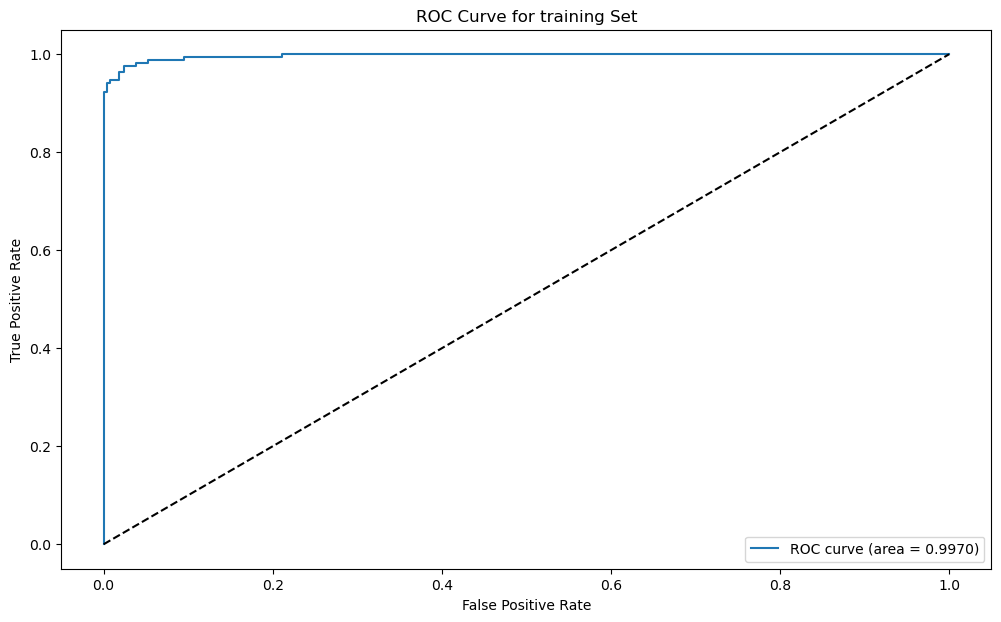

Confusion Matrix for test set:
[[72  0]
 [ 2 40]]

Classification accuracy for test set = 0.9825



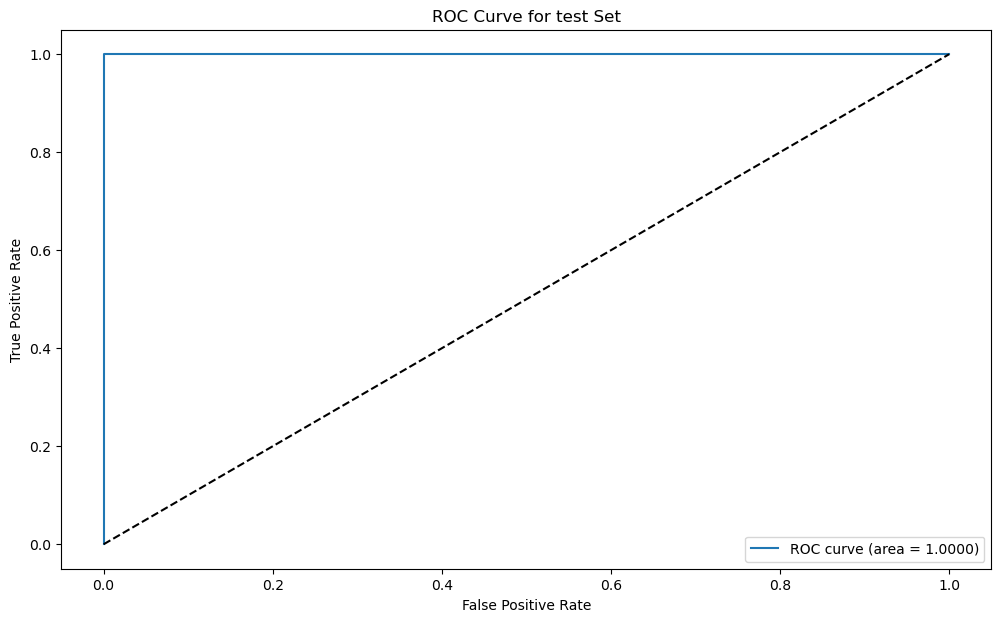


Consolidated Training Metrics:
accuracy     0.984689
precision    0.984724
recall       0.984689
f1-score     0.984667
auc          0.998620
dtype: float64

Consolidated Testing Metrics:
accuracy     0.960234
precision    0.960808
recall       0.960234
f1-score     0.960108
auc          0.992720
dtype: float64


In [14]:
final_results['Supervised'] = train_and_evaluate_svm(breast_cancer_data_set,30)

#### 1(b)-ii. **Semi-Supervised Learning/ Self-training:** Select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.*
1(b)-ii-A. Train an $L1$-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation

1(b)-ii-B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data and the average accuracy, precision, recall, $F_1-score$, and $AUC$, for both training and test sets over your $M$ runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [15]:
def self_training(features, targets, hyperparameters):
    # Convert targets into numpy array if not already
    targets = np.array(targets)

    # Labeling half of the data from each class
    labeled_indices = []
    for label in np.unique(targets):
        indices = np.flatnonzero(targets == label)
        selected_count = round(len(indices) * 0.5)
        chosen_indices = np.random.choice(indices, selected_count, replace=False)
        labeled_indices.extend(chosen_indices)

    # Determining unlabeled data indices
    unlabeled_indices = list(set(range(len(features))) - set(labeled_indices))
    
    # Splitting the data into labeled and unlabeled datasets
    labeled_features = features[labeled_indices]
    labeled_targets = targets[labeled_indices]
    unlabeled_features = features[unlabeled_indices]
    unlabeled_targets = targets[unlabeled_indices]

    # Initialize the best model tracking variables
    best_model = None
    best_score = -np.inf

    # Grid search through hyperparameters
    for config in ParameterGrid(hyperparameters):
        model = SVC(kernel='linear', **config)
        model.fit(labeled_features, labeled_targets)
        score = model.score(labeled_features, labeled_targets)

        # Update best model if current model is better
        if score > best_score:
            best_score = score
            best_model = model

    # Iteratively include more unlabeled data based on confidence
    while len(unlabeled_features) > 0:
        confidence_scores = best_model.decision_function(unlabeled_features)
        sorted_indices = np.argsort(np.abs(confidence_scores))
        most_uncertain_index = sorted_indices[0]

        # Add most uncertain data to labeled set
        labeled_features = np.vstack([labeled_features, unlabeled_features[most_uncertain_index]])
        labeled_targets = np.append(labeled_targets, unlabeled_targets[most_uncertain_index])
        unlabeled_features = np.delete(unlabeled_features, most_uncertain_index, axis=0)
        unlabeled_targets = np.delete(unlabeled_targets, most_uncertain_index)

        # Re-fit model with updated data
        best_model.fit(labeled_features, labeled_targets)

    return best_model

In [16]:
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVC


def train_and_evaluate_semi_supervised_svm(dataset, iterations):
    # Configuration for SVM parameter optimization
    hyperparameters = {
        'C': np.logspace(-4, 8, 20)
    }

    # DataFrames to hold metrics for each iteration
    semi_supervised_svm_metrics_train_list = []
    semi_supervised_svm_metrics_test_list = []
    for trial in range(iterations):
        # Randomly partition the dataset
        train_X, test_X, train_Y, test_Y = stratified_data_set_split(dataset, random_seed=trial)
    
        # Normalize feature data
        train_X, test_X = normalize_features(train_X, test_X)

        # Classifier (semi-supervised and self-training)
        model = self_training(train_X, train_Y, hyperparameters)

        # Prediction and evaluation
        labels_predicted_train = model.predict(train_X)
        labels_predicted_test = model.predict(test_X)
        probabilities_train = model.decision_function(train_X)
        probabilities_test = model.decision_function(test_X)
        
        # Generate performance reports
        report_train = classification_report(train_Y, labels_predicted_train, output_dict=True)
        report_test = classification_report(test_Y, labels_predicted_test, output_dict=True)

        # Store metrics from the reports
        semi_supervised_svm_metrics_train_list.append(pd.DataFrame([evaluate_model_metrics(train_Y, labels_predicted_train, probabilities_train, report_train)]))
        semi_supervised_svm_metrics_test_list.append(pd.DataFrame([evaluate_model_metrics(test_Y, labels_predicted_test, probabilities_test, report_test)]))

        print(f"Trial {trial + 1} completed: Train Accuracy = {report_train['accuracy']:.4f}, Test Accuracy = {report_test['accuracy']:.4f}")
        if hasattr(model, 'best_params_'):
            print("Optimal Parameters Found:", model.best_params_, "\n")

    # Print summary after all trials
    print('Detailed summary after all trials:')
    print('-' * 100)

    semi_supervised_svm_metrics_train = pd.concat(semi_supervised_svm_metrics_train_list, ignore_index=True)
    semi_supervised_svm_metrics_test = pd.concat(semi_supervised_svm_metrics_test_list, ignore_index=True)

    display_model_results(train_Y, labels_predicted_train,probabilities_train,report_train,'training')
    display_model_results(test_Y, labels_predicted_test,probabilities_test,report_test, 'test')
    
    # Compute average metrics for all trials
    semi_supervised_svm_average_metrics_train = semi_supervised_svm_metrics_train.mean()
    semi_supervised_svm_average_metrics_test = semi_supervised_svm_metrics_test.mean()

    print("\nConsolidated Training Metrics:")
    print(semi_supervised_svm_average_metrics_train)
    print("\nConsolidated Testing Metrics:")
    print(semi_supervised_svm_average_metrics_test)

    # Combine training and testing metrics for final output
    semi_supervised_svm_final_metrics = pd.concat([semi_supervised_svm_average_metrics_train, semi_supervised_svm_average_metrics_test], axis=1).T
    semi_supervised_svm_final_metrics.index = ['Training', 'Testing']
    return semi_supervised_svm_final_metrics

Trial 1 completed: Train Accuracy = 0.9692, Test Accuracy = 0.9649
Trial 2 completed: Train Accuracy = 0.9692, Test Accuracy = 0.9737
Trial 3 completed: Train Accuracy = 0.9758, Test Accuracy = 0.9386
Trial 4 completed: Train Accuracy = 0.9648, Test Accuracy = 0.9825
Trial 5 completed: Train Accuracy = 0.9868, Test Accuracy = 0.9211
Trial 6 completed: Train Accuracy = 0.9736, Test Accuracy = 0.9386
Trial 7 completed: Train Accuracy = 0.9714, Test Accuracy = 0.9649
Trial 8 completed: Train Accuracy = 0.9758, Test Accuracy = 0.9386
Trial 9 completed: Train Accuracy = 0.9758, Test Accuracy = 0.9737
Trial 10 completed: Train Accuracy = 0.9714, Test Accuracy = 0.9561
Trial 11 completed: Train Accuracy = 0.9714, Test Accuracy = 0.9561
Trial 12 completed: Train Accuracy = 0.9692, Test Accuracy = 0.9561
Trial 13 completed: Train Accuracy = 0.9692, Test Accuracy = 0.9649
Trial 14 completed: Train Accuracy = 0.9758, Test Accuracy = 0.9649
Trial 15 completed: Train Accuracy = 0.9846, Test Accurac

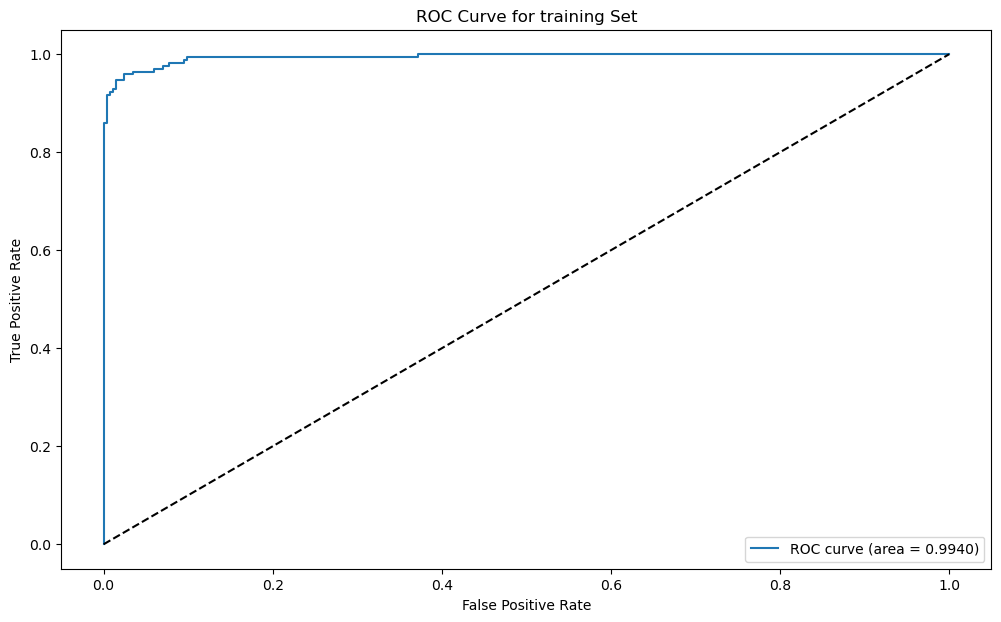

Confusion Matrix for test set:
[[70  2]
 [ 2 40]]

Classification accuracy for test set = 0.9649



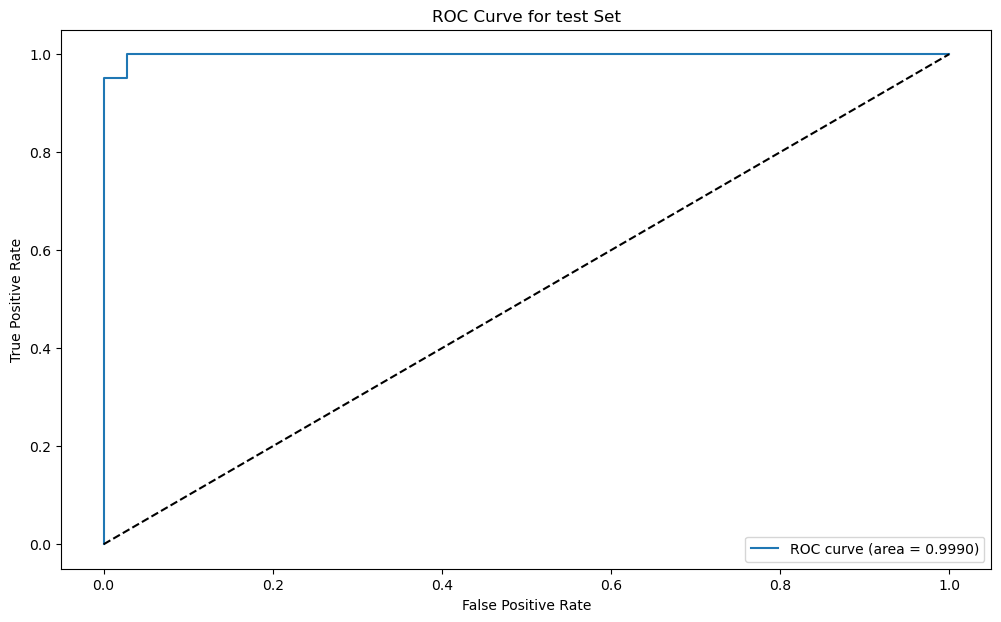


Consolidated Training Metrics:
accuracy     0.973846
precision    0.973877
recall       0.973846
f1-score     0.973802
auc          0.995193
dtype: float64

Consolidated Testing Metrics:
accuracy     0.954678
precision    0.955275
recall       0.954678
f1-score     0.954623
auc          0.990567
dtype: float64


In [17]:
final_results['Semi_Supervised'] = train_and_evaluate_semi_supervised_svm(breast_cancer_data_set,30)

*1(b)-iii. **Unsupervised Learning:** Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume $k = 2$.*

1(b)-iii-A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

**Observation:**
# > - The number of iterations can be adjusted to help avoid getting stuck in a local minimum.

1(b)-iii-B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, $F_1-score$, and $AUC$ over $M$ runs, and ROC and the confusion matrix for one of the runs.


1(b)-iii-C. Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, $F_1-score$, and $AUC$ over $M$ runs, and ROC and the confusion matrix for one of the runs for the test data


In [18]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, roc_curve, auc
from scipy.special import softmax
import matplotlib.pyplot as plt




def calculate_distances_and_probabilities(centers, features, labels):
    num_points = features.shape[0]
    distances = np.zeros((num_points, len(centers)))
    for i in range(len(centers)):
        distances[:, i] = np.linalg.norm(features - centers[i], axis=1)
    probabilities = softmax(-distances, axis=1)  # Use negative distances for softmax
    return distances, probabilities

def assign_labels_by_majority(distances, labels, true_labels):
    new_labels = np.zeros_like(labels)
    label_map = {}
    for cluster in range(2):  # Assuming two clusters
        indices = np.where(labels == cluster)[0]
        if indices.size > 0:
            sorted_indices = indices[np.argsort(distances[indices][:, cluster])][:30]  # Get top 30 by distance
            if sorted_indices.size > 0:
                majority_label = true_labels.iloc[sorted_indices].mode()[0]
                new_labels[indices] = majority_label
                label_map[cluster] = majority_label
    return label_map, new_labels

In [19]:
def perform_k_means_clustering_and_evaluation(data, n_iterations):
    metrics_summary_train = pd.DataFrame()
    metrics_summary_test = pd.DataFrame()

    for i in range(n_iterations):
        print(f"Running iteration {i+1} of {n_iterations}")
        train_X, test_X, train_Y, test_Y = stratified_data_set_split(data, random_seed=i)
        train_X, test_X = normalize_features(train_X, test_X)

        kmeans = KMeans(n_clusters=2, n_init=15, random_state=i).fit(train_X)
        train_labels = kmeans.predict(train_X)
        test_labels = kmeans.predict(test_X)

        train_distances, train_probabilities = calculate_distances_and_probabilities(kmeans.cluster_centers_, train_X, train_labels)
        test_distances, test_probabilities = calculate_distances_and_probabilities(kmeans.cluster_centers_, test_X, test_labels)

        label_map_train, train_pred_Y = assign_labels_by_majority(train_distances, train_labels, train_Y)
        label_map_test, test_pred_Y = assign_labels_by_majority(test_distances, test_labels, test_Y)

        positive_cluster_train = label_map_train[1]  # Adjust based on your positive class
        positive_cluster_test = label_map_test[1]  # Adjust based on your positive class

        train_metrics_dict = evaluate_model_metrics(train_Y, train_pred_Y, train_probabilities[:, positive_cluster_train], classification_report(train_Y, train_pred_Y, output_dict=True))
        test_metrics_dict = evaluate_model_metrics(test_Y, test_pred_Y, test_probabilities[:, positive_cluster_test], classification_report(test_Y, test_pred_Y, output_dict=True))

        metrics_summary_train = pd.concat([metrics_summary_train, pd.DataFrame([train_metrics_dict])], ignore_index=True)
        metrics_summary_test = pd.concat([metrics_summary_test, pd.DataFrame([test_metrics_dict])], ignore_index=True)

        print(f"Iteration {i+1} results: Train Accuracy = {train_metrics_dict['accuracy']}, Test Accuracy = {test_metrics_dict['accuracy']}")

        if i == n_iterations - 1:  # Display results for the last iteration only
            display_model_results(train_Y, train_pred_Y, train_probabilities[:, positive_cluster_train], train_metrics_dict, 'Training')
            display_model_results(test_Y, test_pred_Y, test_probabilities[:, positive_cluster_test], test_metrics_dict, 'Testing')

    print("\nFinalizing results across all iterations...")
    final_metrics_train = metrics_summary_train.mean()
    final_metrics_test = metrics_summary_test.mean()

    combined_summary = pd.concat([final_metrics_train, final_metrics_test], axis=1)
    combined_summary.columns = ['Training', 'Testing']
    print("Average Metrics Across All Iterations:")
    print(combined_summary)

    return combined_summary


Running iteration 1 of 30
Iteration 1 results: Train Accuracy = 0.8769230769230769, Test Accuracy = 0.9035087719298246
Running iteration 2 of 30
Iteration 2 results: Train Accuracy = 0.8989010989010989, Test Accuracy = 0.8508771929824561
Running iteration 3 of 30
Iteration 3 results: Train Accuracy = 0.8857142857142857, Test Accuracy = 0.9122807017543859
Running iteration 4 of 30
Iteration 4 results: Train Accuracy = 0.8879120879120879, Test Accuracy = 0.8596491228070176
Running iteration 5 of 30
Iteration 5 results: Train Accuracy = 0.9164835164835164, Test Accuracy = 0.8070175438596491
Running iteration 6 of 30
Iteration 6 results: Train Accuracy = 0.8945054945054945, Test Accuracy = 0.8771929824561403
Running iteration 7 of 30
Iteration 7 results: Train Accuracy = 0.8879120879120879, Test Accuracy = 0.8859649122807017
Running iteration 8 of 30
Iteration 8 results: Train Accuracy = 0.8923076923076924, Test Accuracy = 0.868421052631579
Running iteration 9 of 30
Iteration 9 results: Tr

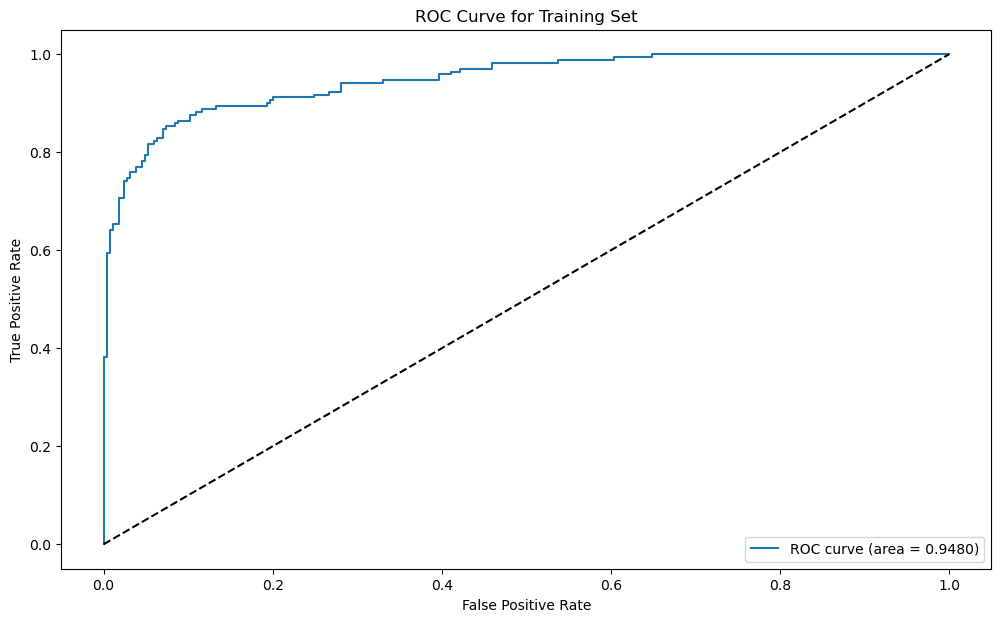

Confusion Matrix for Testing set:
[[72  0]
 [ 7 35]]

Classification accuracy for Testing set = 0.9386



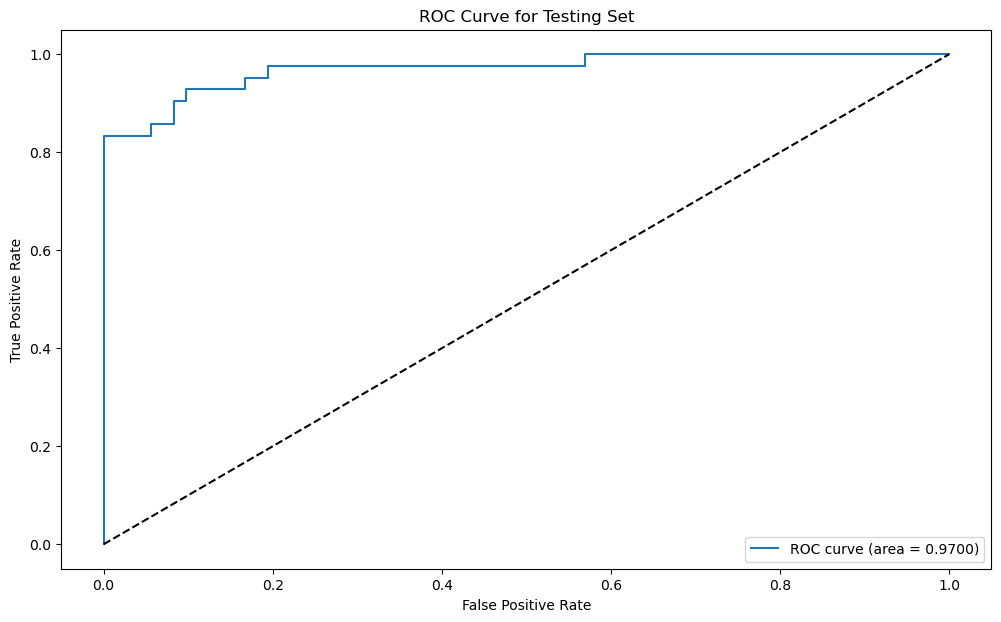


Finalizing results across all iterations...
Average Metrics Across All Iterations:
           Training   Testing
accuracy   0.888425  0.880117
precision  0.897294  0.892156
recall     0.888425  0.880117
f1-score   0.884570  0.874707
auc        0.951120  0.944460


In [20]:
final_results["Unsupervised Learning - kMeans"] =  perform_k_means_clustering_and_evaluation(breast_cancer_data_set,30)

*1(b)-iv. **Spectral Clustering:** Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has $p$ and the negative class has $n$
samples, the two clusters must have $p$ and $n$ members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit−predict method*

In [21]:
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier

def perform_spectral_clustering_and_evaluation(data, n_iterations):
    train_summary = pd.DataFrame()
    test_summary = pd.DataFrame()

    for i in range(n_iterations):
        # Split and normalize data
        train_X, test_X, train_Y, test_Y = stratified_data_set_split(data, random_seed=i)
        train_X, test_X = normalize_features(train_X, test_X)
        
        # Perform Spectral Clustering
        spectral_model = SpectralClustering(n_clusters=2, assign_labels='kmeans', affinity='rbf', 
                                            eigen_tol=1e-2, eigen_solver='arpack', random_state=i)
        train_cluster_labels = spectral_model.fit_predict(train_X)
        
        # Using KNN to assign labels based on the spectral clustering
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(train_X, train_cluster_labels)
        train_pred_Y = knn.predict(train_X)
        test_pred_Y = knn.predict(test_X)
        
        # Calculate probabilities based on distance from cluster centers
        cluster_centers = np.array([train_X[train_cluster_labels == c].mean(axis=0) for c in [0, 1]])
        _, train_probabilities = calculate_distances_and_probabilities(cluster_centers, train_X, train_pred_Y)
        _, test_probabilities = calculate_distances_and_probabilities(cluster_centers, test_X, test_pred_Y)
        
        # Determine the positive class and calculate metrics
        positive_class = 1  
        train_metrics_dict = evaluate_model_metrics(train_Y, train_pred_Y, train_probabilities[:, positive_class], classification_report(train_Y, train_pred_Y, output_dict=True))
        test_metrics_dict = evaluate_model_metrics(test_Y, test_pred_Y, test_probabilities[:, positive_class], classification_report(test_Y, test_pred_Y, output_dict=True))

        # Store results
        train_summary = pd.concat([train_summary, pd.DataFrame([train_metrics_dict])], ignore_index=True)
        test_summary = pd.concat([test_summary, pd.DataFrame([test_metrics_dict])], ignore_index=True)

        print(f"Iteration {i+1} results: Train Accuracy = {train_metrics_dict['accuracy']}, Test Accuracy = {test_metrics_dict['accuracy']}")

        # Plot ROC curves
        if i == n_iterations - 1:  # Display results for the last iteration only
            display_model_results(
                train_Y, 
                train_pred_Y, 
                train_probabilities[:, positive_class], 
                classification_report(train_Y, train_pred_Y, output_dict=True), 
                'Training'
            )
            display_model_results(
                test_Y, 
                test_pred_Y, 
                test_probabilities[:, positive_class], 
                classification_report(test_Y, test_pred_Y, output_dict=True), 
                'Testing'
            )

    # Averaging results
    print("\nFinalizing results across all iterations...")
    final_metrics_train = train_summary.mean()
    final_metrics_test = test_summary.mean()

    combined_summary = pd.concat([final_metrics_train, final_metrics_test], axis=1)
    combined_summary.columns = ['Training', 'Testing']
    print("Average Metrics Across All Iterations:")
    print(combined_summary)

    return combined_summary




Iteration 1 results: Train Accuracy = 0.8747252747252747, Test Accuracy = 0.8859649122807017
Iteration 2 results: Train Accuracy = 0.8901098901098901, Test Accuracy = 0.8421052631578947
Iteration 3 results: Train Accuracy = 0.11868131868131868, Test Accuracy = 0.09649122807017543
Iteration 4 results: Train Accuracy = 0.11428571428571428, Test Accuracy = 0.15789473684210525
Iteration 5 results: Train Accuracy = 0.9054945054945055, Test Accuracy = 0.8245614035087719
Iteration 6 results: Train Accuracy = 0.8879120879120879, Test Accuracy = 0.8947368421052632
Iteration 7 results: Train Accuracy = 0.8813186813186813, Test Accuracy = 0.8771929824561403
Iteration 8 results: Train Accuracy = 0.8857142857142857, Test Accuracy = 0.868421052631579
Iteration 9 results: Train Accuracy = 0.8945054945054945, Test Accuracy = 0.8508771929824561
Iteration 10 results: Train Accuracy = 0.8791208791208791, Test Accuracy = 0.868421052631579
Iteration 11 results: Train Accuracy = 0.8835164835164835, Test Acc

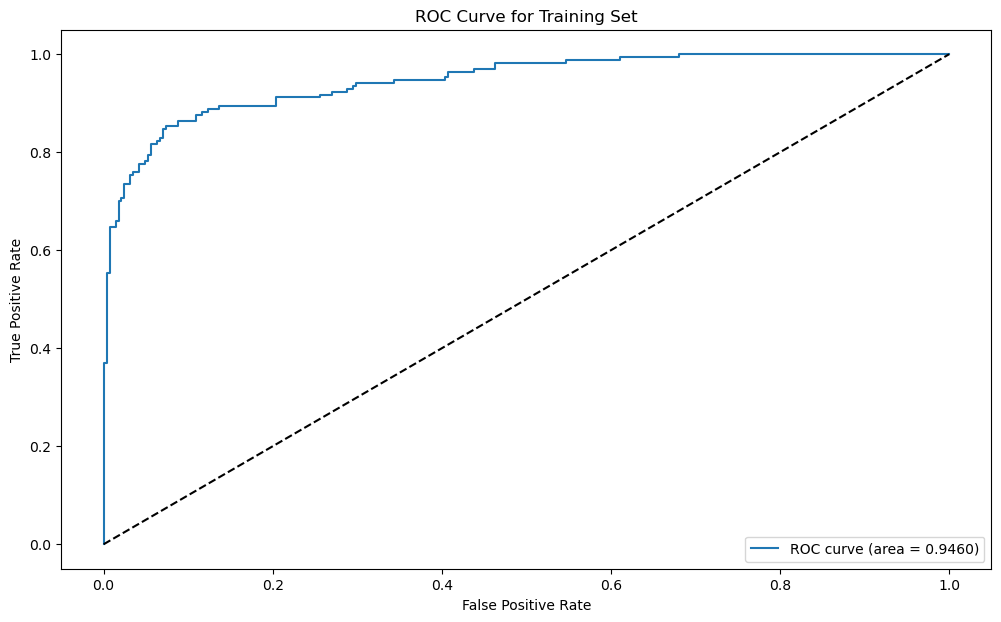

Confusion Matrix for Testing set:
[[72  0]
 [ 9 33]]

Classification accuracy for Testing set = 0.9211



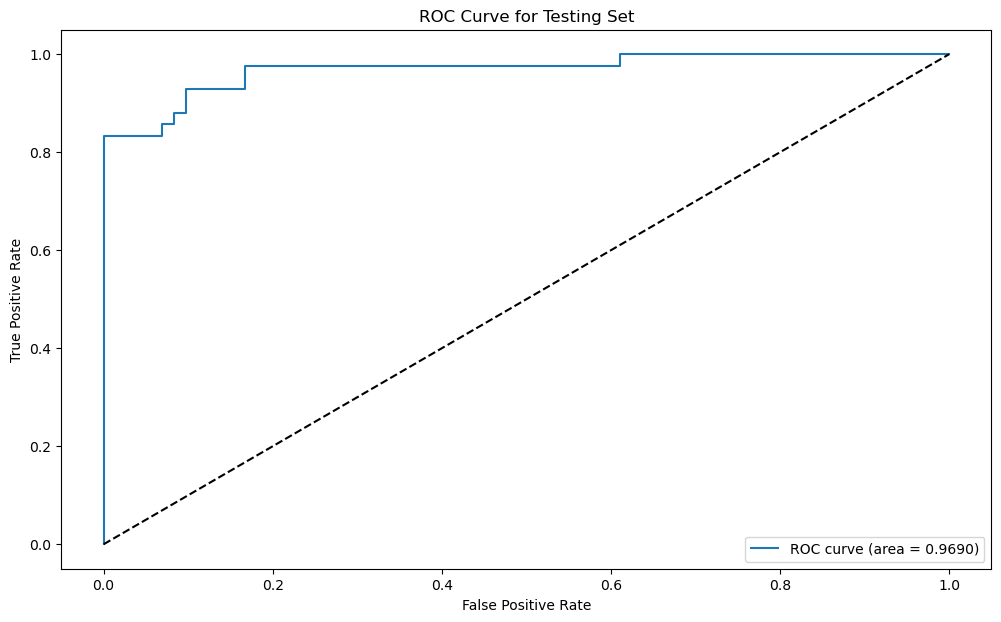


Finalizing results across all iterations...
Average Metrics Across All Iterations:
           Training   Testing
accuracy   0.730183  0.724561
precision  0.730976  0.725478
recall     0.730183  0.724561
f1-score   0.720818  0.712752
auc        0.770827  0.763540


In [22]:
final_results["Unsupervised Learning - Spectral Clustering"] = perform_spectral_clustering_and_evaluation(breast_cancer_data_set, 30)

*1(b)-v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.*

In [23]:
for key in final_results.keys():
    print('\n' + '-' * 60)
    print(key)
    print(final_results[key])


------------------------------------------------------------
Supervised
          accuracy  precision    recall  f1-score      auc
Training  0.984689   0.984724  0.984689  0.984667  0.99862
Testing   0.960234   0.960808  0.960234  0.960108  0.99272

------------------------------------------------------------
Semi_Supervised
          accuracy  precision    recall  f1-score       auc
Training  0.973846   0.973877  0.973846  0.973802  0.995193
Testing   0.954678   0.955275  0.954678  0.954623  0.990567

------------------------------------------------------------
Unsupervised Learning - kMeans
           Training   Testing
accuracy   0.888425  0.880117
precision  0.897294  0.892156
recall     0.888425  0.880117
f1-score   0.884570  0.874707
auc        0.951120  0.944460

------------------------------------------------------------
Unsupervised Learning - Spectral Clustering
           Training   Testing
accuracy   0.730183  0.724561
precision  0.730976  0.725478
recall     0.730183  0.

**Observation:**
> From the summary above, it's clear that supervised learning outperforms semi-supervised learning, which itself performs better than unsupervised learning. The gap between semi-supervised and unsupervised methods is notably larger than that between supervised and semi-supervised. This pattern is expected, as supervised learning benefits from having more labeled data to guide its predictions, while semi-supervised learning has less label information. Unsupervised learning, which relies solely on the similarity of features for making predictions, doesn't perform as well as the other two methods.

# 2. Active Learning Using Support Vector Machines

# 2. Active Learning Using Support Vector Machines

**2(a). Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.**

In [24]:
def read_banknote_file(file_path):
    """
    This function reads a CSV file containing banknote authentication data and returns it as a DataFrame.
    Each column in the DataFrame is given a specific name to describe the data it holds.
    
    Parameters:
    file_path (str): The path to the CSV file containing the data.
    
    Returns:
    DataFrame: A pandas DataFrame containing the data from the CSV file with appropriate column headers.
    """
    # Define the column headers for clarity in the resulting DataFrame
    headers = ['variance', 'skewness', 'curtosis', 'entropy', 'class_label']
    
    # Read the CSV file without a header and assign the defined column names
    data_frame = pd.read_csv(file_path, header=None, names=headers)
    
    return data_frame


path_to_file = "../data/data_banknote_authentication.txt"
authentication_data = read_banknote_file(path_to_file)


In [25]:
authentication_data

,variance,skewness,curtosis,entropy,class_label
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [26]:
authentication_data["class_label"].value_counts()

class_label
0    762
1    610
Name: count, dtype: int64

In [27]:
import numpy as np  # Ensure numpy is imported for array operations

def partition_dataset(dataset, num_train=900, num_test=472):
    """
    This function partitions the dataset into training and testing subsets based on specified sizes.
    It randomly selects indices for the test set and determines the remaining indices for the training set.
    
    Parameters:
    dataset (DataFrame): The dataset from which to partition the data.
    num_train (int): The number of samples to include in the training set.
    num_test (int): The number of samples to include in the test set.
    
    Returns:
    dict: A dictionary containing arrays of indices for the training and testing data subsets.
    """
    # Generate an array of indices based on the total number of rows in the dataset
    all_indices = np.arange(dataset.shape[0])
    
    # Randomly select indices for the test set
    indices_for_test = np.random.choice(all_indices, num_test, replace=False)
    
    # Determine the remaining indices for the training set
    indices_for_train = np.setdiff1d(all_indices, indices_for_test)
    
    return {'train_indices': indices_for_train, 'test_indices': indices_for_test}


In [28]:
data_partition = partition_dataset(authentication_data)
print("Train Indices:", data_partition['train_indices'])
print("Test Indices:", data_partition['test_indices'])

Train Indices: [   0    2    4    5    6    7   10   11   15   16   18   19   20   21
   22   25   26   27   28   29   31   32   35   36   38   40   42   43
   44   45   46   47   49   50   51   54   56   59   60   61   62   64
   66   67   68   69   70   71   72   73   75   78   79   81   82   83
   84   85   86   88   89   90   91   92   93   96   97   98  100  101
  102  104  105  106  107  108  109  110  111  112  114  115  116  117
  118  120  121  123  125  129  138  139  142  145  146  147  148  152
  154  157  158  159  160  161  162  163  164  166  169  170  172  173
  174  175  176  177  181  182  184  185  186  188  190  191  192  193
  194  195  197  198  200  204  205  206  207  209  210  211  212  214
  215  216  217  219  220  221  222  223  224  226  229  230  231  232
  233  234  235  237  239  240  241  242  244  246  248  250  251  253
  254  255  258  259  260  263  266  267  269  270  272  273  274  275
  276  279  280  281  282  283  284  285  286  287  289  290  

In [29]:
indices = partition_dataset(authentication_data)


authentication_train = authentication_data.iloc[indices['train_indices']]
authentication_test = authentication_data.iloc[indices['test_indices']]


print("Training Data Sample:")
print(authentication_train.head())
print("\nTesting Data Sample:")
print(authentication_test.head())


Training Data Sample:
   variance  skewness  curtosis  entropy  class_label
1   4.54590    8.1674  -2.45860 -1.46210            0
2   3.86600   -2.6383   1.92420  0.10645            0
4   0.32924   -4.4552   4.57180 -0.98880            0
5   4.36840    9.6718  -3.96060 -3.16250            0
6   3.59120    3.0129   0.72888  0.56421            0

Testing Data Sample:
      variance  skewness  curtosis  entropy  class_label
1108    1.4501    3.6067 -4.055700 -1.59660            1
571     2.2517   -5.1422  4.291600 -1.24870            0
73      4.1654   -3.4495  3.643000  1.08790            0
1104   -3.0193    1.7775  0.737450 -0.45346            1
1081   -5.1190    6.6486 -0.049987 -6.52060            1



**2(b). Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure.**

*2(b)-i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and $L1-penalty$. Select the penalty parameter using 5-fold cross validation. Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning*

In [30]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def calculate_accuracy_over_iterations(X_train, y_train, X_test, y_test, search_params):
    indices = np.arange(len(X_train))
    selected_indices = []
    accuracies = []
    
    while indices.size > 0:
        np.random.shuffle(indices)
        current_batch, indices = indices[:10], indices[10:]
        selected_indices.extend(current_batch)
        
        current_X_train = X_train[selected_indices]
        current_y_train = y_train.iloc[selected_indices]
        
        model = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **search_params)
        model.fit(current_X_train, current_y_train)
        predictions = model.predict(X_test)
        report = classification_report(y_test, predictions, output_dict=True)
        accuracies.append(report['accuracy'])
    
    return accuracies


In [31]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

def passive_learning(data, iterations):
    # Parameter setup for GridSearchCV
    tuned_params = {'C': np.logspace(-2, 7, 20)}
    search_params = {'param_grid': tuned_params, 'scoring': 'f1_weighted', 'n_jobs': -1, 'verbose': 0}
    
    learning_curve = []
    num_samples = 472  # This should be adjusted based on specific requirements

    for iteration in range(iterations):
        test_indices = np.random.choice(data.shape[0], num_samples, replace=False)
        train_indices = np.array([idx for idx in range(data.shape[0]) if idx not in test_indices])
        
        train_set, test_set = data.iloc[train_indices], data.iloc[test_indices]
        train_X, train_Y = train_set.iloc[:, :-1], train_set.iloc[:, -1]
        test_X, test_Y = test_set.iloc[:, :-1], test_set.iloc[:, -1]

        # Data normalization
        scaler = StandardScaler()
        train_X = scaler.fit_transform(train_X)
        test_X = scaler.transform(test_X)

        # Update parameters with cross-validation strategy
        search_params['cv'] = StratifiedKFold(5, random_state=iteration, shuffle=True)

        # Calculate accuracy per iteration
        accuracy_list = calculate_accuracy_over_iterations(train_X, train_Y, test_X, test_Y, search_params)
        learning_curve.append(accuracy_list)

        print(f"Attempt {iteration + 1} ~ Test acc with 10 samples: {accuracy_list[0]:.4f}, Test acc with 900 samples: {accuracy_list[-1]:.4f}")
    
    # Calculate the mean accuracy across all iterations for each sample count
    learning_curve = np.mean(np.array(learning_curve), axis=0)
    return learning_curve


In [32]:
passive_learning_curve = passive_learning(authentication_data, 50)

Attempt 1 ~ Test acc with 10 samples: 0.8919, Test acc with 900 samples: 0.9894
Attempt 2 ~ Test acc with 10 samples: 0.8496, Test acc with 900 samples: 0.9915
Attempt 3 ~ Test acc with 10 samples: 0.5360, Test acc with 900 samples: 0.9873
Attempt 4 ~ Test acc with 10 samples: 0.7436, Test acc with 900 samples: 0.9831
Attempt 5 ~ Test acc with 10 samples: 0.8496, Test acc with 900 samples: 0.9915
Attempt 6 ~ Test acc with 10 samples: 0.9703, Test acc with 900 samples: 0.9852
Attempt 7 ~ Test acc with 10 samples: 0.7542, Test acc with 900 samples: 0.9894
Attempt 8 ~ Test acc with 10 samples: 0.6441, Test acc with 900 samples: 0.9873
Attempt 9 ~ Test acc with 10 samples: 0.9640, Test acc with 900 samples: 0.9936
Attempt 10 ~ Test acc with 10 samples: 0.5403, Test acc with 900 samples: 0.9873
Attempt 11 ~ Test acc with 10 samples: 0.7860, Test acc with 900 samples: 0.9936
Attempt 12 ~ Test acc with 10 samples: 0.7839, Test acc with 900 samples: 0.9873
Attempt 13 ~ Test acc with 10 samples

*2(b)-ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and $L1-penalty$. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning*

In [33]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def active_learning_accuracy(X_train, y_train, X_test, y_test, search_params):
    indices_available = np.arange(X_train.shape[0])
    selected_indices = []
    accuracy_scores = []

    # Initial random selection of 10 indices
    np.random.shuffle(indices_available)
    selected_batch, indices_available = indices_available[:10], indices_available[10:]
    selected_indices.extend(selected_batch)
    
    while len(selected_indices) <= 900:
        X_train_used = X_train[selected_indices]
        y_train_used = y_train.iloc[selected_indices]
        
        classifier = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **search_params)
        classifier.fit(X_train_used, y_train_used)
        
        predictions = classifier.predict(X_test)
        report = classification_report(y_test, predictions, output_dict=True)
        accuracy_scores.append(report['accuracy'])
        
        if len(indices_available) == 0:
            break
        
        # Selecting the next batch of indices based on model uncertainty
        distances = classifier.decision_function(X_train[indices_available])
        arg_sorted_indices = np.argsort([abs(dist) for dist in distances])
        indices_available = indices_available[arg_sorted_indices]
        
        selected_batch, indices_available = indices_available[:10], indices_available[10:]
        selected_indices.extend(selected_batch)
        
    return accuracy_scores


In [34]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

def active_learning(data, iterations):
    tuned_params = {'C': np.logspace(-2, 7, 20)}
    search_params = {'param_grid': tuned_params, 'scoring': 'f1_weighted', 'n_jobs': -1, 'verbose': 0}
    
    learning_curve = []
    num_samples = 472  

    for iteration in range(iterations):
        test_indices = np.random.choice(data.shape[0], num_samples, replace=False)
        train_indices = np.array([idx for idx in range(data.shape[0]) if idx not in test_indices])

        train_set, test_set = data.iloc[train_indices], data.iloc[test_indices]
        train_X, train_Y = train_set.iloc[:, :-1], train_set.iloc[:, -1]
        test_X, test_Y = test_set.iloc[:, :-1], test_set.iloc[:, -1]

        scaler = StandardScaler()
        train_X = scaler.fit_transform(train_X)
        test_X = scaler.transform(test_X)

        search_params['cv'] = StratifiedKFold(5, random_state=iteration, shuffle=True)

        try:
            accuracy_list = active_learning_accuracy(train_X, train_Y, test_X, test_Y, search_params)
            learning_curve.append(accuracy_list)
            print(f"Attempt {iteration + 1} ~ Test acc with 10 samples: {accuracy_list[0]:.4f}, Test acc with 900 samples: {accuracy_list[-1]:.4f}")
        except ValueError as e:
            print(f"Attempt {iteration + 1} failed due to an error: {e}")
            continue  

    return learning_curve

In [35]:
active_learning_curve = active_learning(authentication_data, 50)

Attempt 1 ~ Test acc with 10 samples: 0.8623, Test acc with 900 samples: 0.9873
Attempt 2 ~ Test acc with 10 samples: 0.9746, Test acc with 900 samples: 0.9873
Attempt 3 ~ Test acc with 10 samples: 0.8475, Test acc with 900 samples: 0.9936
Attempt 4 ~ Test acc with 10 samples: 0.9025, Test acc with 900 samples: 0.9894
Attempt 5 ~ Test acc with 10 samples: 0.9280, Test acc with 900 samples: 0.9936
Attempt 6 ~ Test acc with 10 samples: 0.7479, Test acc with 900 samples: 0.9873
Attempt 7 ~ Test acc with 10 samples: 0.9746, Test acc with 900 samples: 0.9936
Attempt 8 ~ Test acc with 10 samples: 0.7839, Test acc with 900 samples: 0.9852
Attempt 9 ~ Test acc with 10 samples: 0.9640, Test acc with 900 samples: 0.9894
Attempt 10 ~ Test acc with 10 samples: 0.8962, Test acc with 900 samples: 0.9915
Attempt 11 ~ Test acc with 10 samples: 0.9513, Test acc with 900 samples: 0.9915
Attempt 12 ~ Test acc with 10 samples: 0.8581, Test acc with 900 samples: 0.9894
Attempt 13 ~ Test acc with 10 samples

**2(c). Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation**

In [36]:
import numpy as np
import matplotlib.pyplot as plt


def plot_learning_curve(passive_errors, active_errors):
    training_sizes = 10 * np.arange(1, 91)  
    
    # Setup the plot
    fig, ax = plt.subplots(figsize=(10, 8))
    
   
    active_errors = np.array(active_errors)

    
    if active_errors.ndim == 2:
        active_errors = np.mean(active_errors, axis=0)
    
    
    passive_errors = np.array(passive_errors)
    if passive_errors.ndim == 2:
        passive_errors = np.mean(passive_errors, axis=0)

    
    ax.plot(training_sizes, 1 - passive_errors, label='Passive Learning')
    ax.plot(training_sizes, 1 - active_errors, label='Active Learning')
    
    # Setting the labels and title of the plot
    ax.set_xlabel("Training Set Size")
    ax.set_ylabel("Test Error Rate")
    ax.set_title("Learning Curve Comparison")
    ax.legend()
    
    # Show the plot
    plt.show()



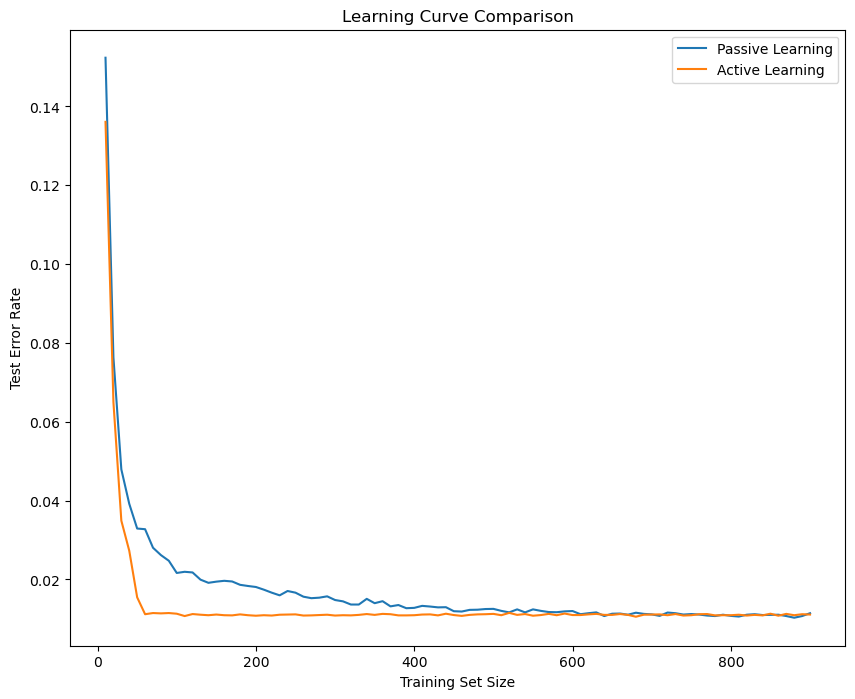

In [37]:
plot_learning_curve(passive_learning_curve,active_learning_curve )

# conclusion 
* we can see that as we increase the size of the training set, the test error reduces, and we have achieved an elbow point somewhere near 50. from then, the training error is more or less similar without high variation or spikes, which can be clearly seen in the plot above. 

## References

- **NumPy Documentation**: [https://numpy.org/doc/stable/](https://numpy.org/doc/stable/)
- **pandas Documentation**: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
- **Matplotlib Documentation**: [https://matplotlib.org/stable/contents.html](https://matplotlib.org/stable/contents.html)
- **scikit-learn Documentation**: [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)
- **OpenAI ChatGPT**: [https://chat.openai.com/](https://chat.openai.com/)
- **Google Search**: [https://www.google.com/search](https://www.google.com/search)
- **Google Home Page**: [https://www.google.com](https://www.google.com)
- **CampusX YouTubeMLtructures Playlist**: [https://www.youtube.com/watch?v=Ka5i9TVUT-E&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=110](https://www.youtube.com/watch?v=Ka5i9TVUT-E&list=PLKnIA16_Rmvbr7zKYQuBfsVkjoLcJgxHH&index=110)


le/

In [38]:
!pip freeze > requirements.txt